C-MDS Classical Multi Dimensional Scaling

https://en.wikipedia.org/wiki/Multidimensional_scaling
http://www.nervouscomputer.com/hfs/cmdscale-in-python/

Classical multidimensional scaling (MDS) is a useful way to visualize high-dimensional distance (or “dissimilarity”) data in a few—usually two—dimensions, though it’s actually derived by asking the question, what are the coordinates of a set of points with given pairwise distances? See, for example, Multidimensional Scaling, Second Edition. Matlab has a built-in function, cmdscale, that does this for you, but in Python you have to write your own. Luckily, it’s pretty simple. Here’s the whole thing:

In [1]:
from __future__ import division
import numpy as np
 
def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

In [2]:
import pandas as pd
import os
filename = os.getcwd()+"\\datasets\\roll_noise.csv"

df=pd.read_csv(filename)
df


,x,y,z,label
0,9.776256,12.774458,-5.027362,11.895595
1,-1.962271,3.671790,9.017432,8.043222
2,4.136847,8.753212,1.812413,6.860596
3,0.343525,6.593736,-8.360199,4.878650
4,-3.315558,21.336510,-5.208921,10.163064
...,...,...,...,...
4995,-9.259536,19.639284,3.254778,9.171088
4996,8.270014,7.368141,-2.864452,6.173011
4997,11.509900,13.567623,9.833746,13.259691
4998,-7.576079,5.814287,6.874807,8.821710


In [3]:
import numpy as np
X=np.array(df.iloc[:,:3])

#Euclidean Distance Matrix #https://medium.com/swlh/euclidean-distance-matrix-4c3e1378d87f
#Gram Matrix
G = X.dot(X.T)
G.shape

(5000, 5000)

In [4]:
Y, evals = cmdscale(G)


In [5]:
evals[:2], Y[:2]

(array([2.10583018e-08, 1.62195568e-08]),
 array([[ 5.48303081e-08,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.47412599e-05,  4.73262864e-06, -5.17165876e-06, ...,
          1.79419686e-10, -4.09853234e-11,  9.28791372e-11]]))

In [6]:
import matplotlib.pyplot as plt
Y2 = Y[:2]*len(Y)
print(Y2.shape)

(2, 2364)


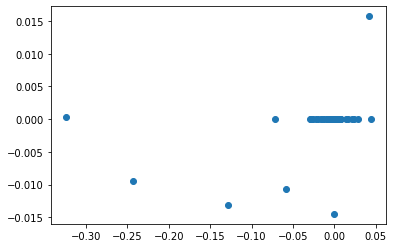

In [7]:
plt.scatter(y=Y2[0], x=Y2[1])

In [8]:
Y2[1]

array([-3.23706300e-01,  2.36631432e-02, -2.58582938e-02, ...,
        8.97098428e-07, -2.04926617e-07,  4.64395686e-07])